In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import seaborn as sns
import scipy.stats as stats

# Question 1) 
Predict delivery time using sorting time

In [2]:
#Read the data set
data=pd.read_csv("delivery_time.csv")
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# EDA

In [3]:
data.shape

(21, 2)

In [4]:
data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [6]:
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [7]:
data.tail()

,Delivery Time,Sorting Time
16,13.75,6
17,18.11,7
18,8.00,2
19,17.83,7
20,21.50,5


In [8]:
data.sample(3)

,Delivery Time,Sorting Time
18,8.0,2
3,24.0,9
13,11.5,3


In [9]:
data.isna().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

# Data Visualization

In [10]:
data=data.rename({"Delivery Time":"delivery_time","Sorting Time":"sorting_time"},axis=1)
data.head()

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


Text(0, 0.5, 'delivery_time')

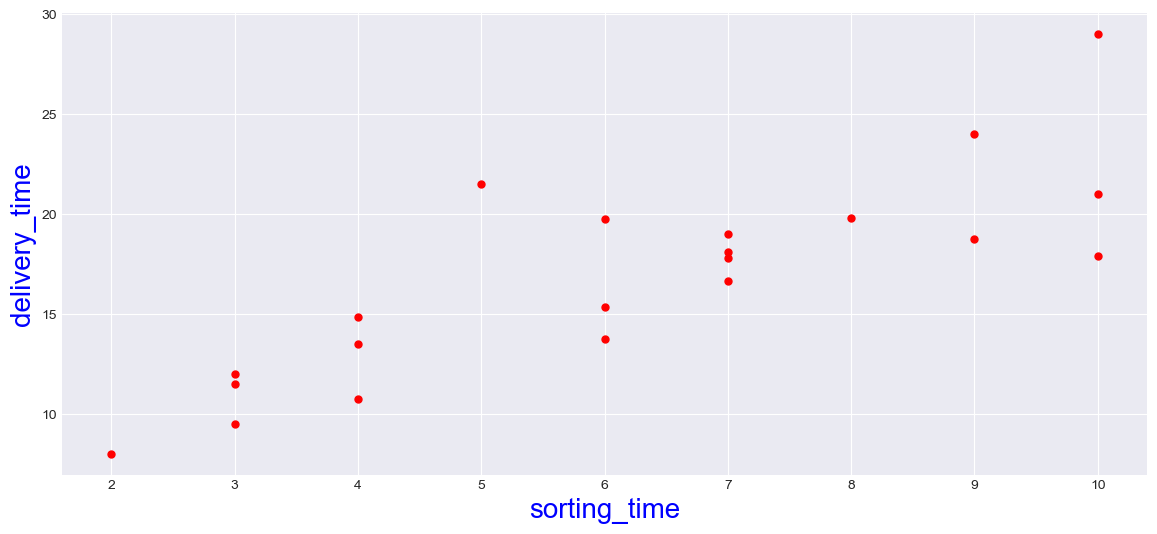

In [11]:
plt.figure(figsize=(14,6))
plt.style.use("seaborn-darkgrid")
plt.scatter(data["sorting_time"],data["delivery_time"],s=25,color="red")
plt.xlabel("sorting_time",size=20,color="blue")
plt.ylabel("delivery_time",size=20,color="blue")

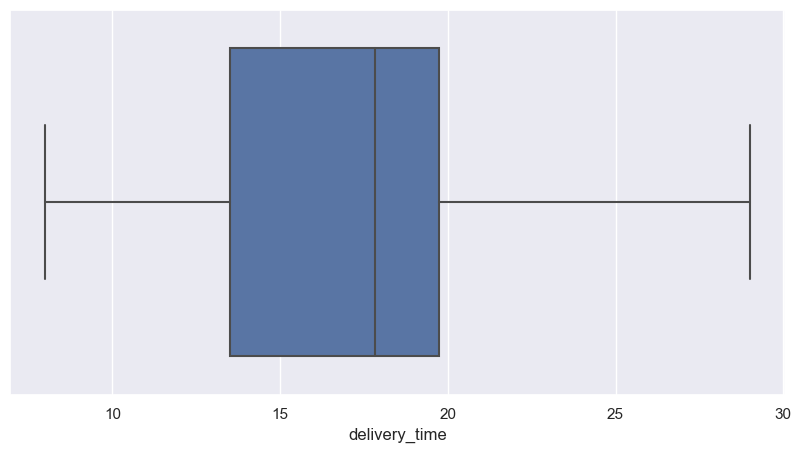

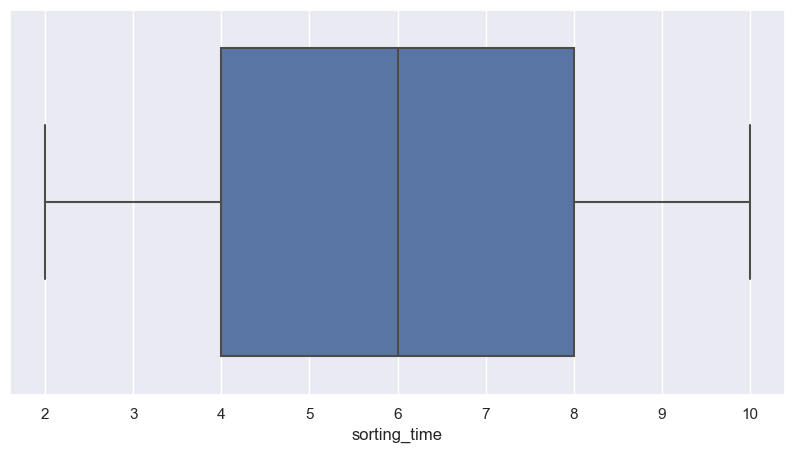

In [54]:
plt.figure(figsize = (10,5))
plt.tight_layout()
sns.boxplot(data.delivery_time)
plt.show()

plt.figure(figsize = (10,5))
plt.tight_layout()
sns.boxplot(data.sorting_time)
plt.show()

<AxesSubplot:xlabel='sorting_time', ylabel='delivery_time'>

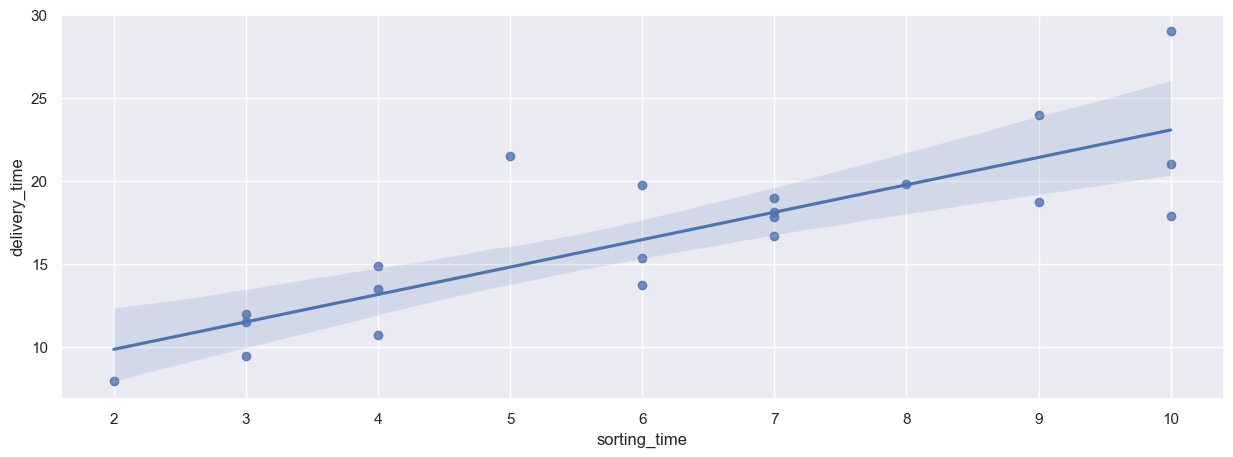

In [55]:
sns.regplot(x=data['sorting_time'],y=data['delivery_time'])

In [12]:
data.corr()
#It is a positive correlation plot.As sorting_time increases delivery_time 
#also increases.

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


# Model

In [13]:
model=LinearRegression()
model.fit(data[["sorting_time"]],data["delivery_time"])

LinearRegression()

In [14]:
pred=model.predict(data[["sorting_time"]])

Text(0, 0.5, 'delivery_time')

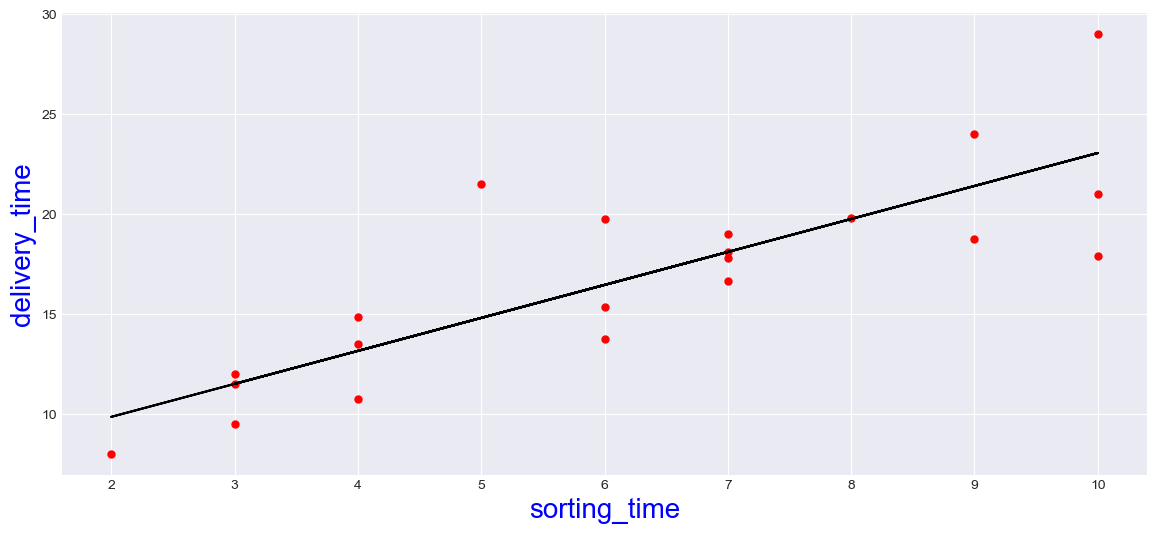

In [15]:
plt.figure(figsize=(14,6))
plt.style.use("seaborn-darkgrid")
plt.scatter(data["sorting_time"],data["delivery_time"],s=25,color="red")
plt.plot(data["sorting_time"],pred,color="black")
plt.xlabel("sorting_time",size=20,color="blue")
plt.ylabel("delivery_time",size=20,color="blue")

In [16]:
model.intercept_
#C value is 6.58

6.58273397199706

In [17]:
model.coef_
# m value is 1.6490

array([1.6490199])

# Finding r2-score

In [18]:
r2_score(data["delivery_time"],pred)

0.6822714748417231

# Another Model

In [19]:
import statsmodels.formula.api as smf

In [20]:
model1=smf.ols("delivery_time~sorting_time",data=data).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Thu, 23 Mar 2023   Prob (F-statistic):           3.98e-06
Time:                        13:25:23   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
#Use different transformations to select the best model
model2 = smf.ols('delivery_time~np.log(sorting_time)', data = data).fit()
model2.summary()#69.5%

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Thu, 23 Mar 2023   Prob (F-statistic):           2.64e-06
Time:                        13:25:23   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(sorting_time)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
#Logarithmic Transformation
model3 = smf.ols('np.log(delivery_time)~np.log(sorting_time)+pow(sorting_time,10)', data = data).fit()
model3.summary()#77.3%

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(delivery_time)   R-squared:                       0.773
Model:                               OLS   Adj. R-squared:                  0.748
Method:                    Least Squares   F-statistic:                     30.70
Date:                   Thu, 23 Mar 2023   Prob (F-statistic):           1.58e-06
Time:                           13:25:23   Log-Likelihood:                 10.344
No. Observations:                     21   AIC:                            -14.69
Df Residuals:                         18   BIC:                            -11.55
Df Model:                              2                                         
Covariance Type:               nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.7164      0.160     10.706      0.000       1.380       2.053
np.log(sorting_time)      0.6166      0.099      6.237      0.000       0.409       0.824
pow(sorting_time, 10) -3.955e-12    1.3e-11     -0.303      0.765   -3.13e-11    2.34e-11
==============================================================================
Omnibus:                        2.197   Durbin-Watson:                   1.345
Prob(Omnibus):                  0.333   Jarque-Bera (JB):                1.422
Skew:                           0.636   Prob(JB):                        0.491
Kurtosis:                       2.915   Cond. No.                     2.12e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.12e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
#Exponential Transformation
model4 = smf.ols('delivery_time~np.exp(sorting_time)', data = data).fit()
model4.summary()#36%

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     10.74
Date:                Thu, 23 Mar 2023   Prob (F-statistic):            0.00396
Time:                        13:25:23   Log-Likelihood:                -58.691
No. Observations:                  21   AIC:                             121.4
Df Residuals:                      19   BIC:                             123.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               15.0836      1.047     14.406      0.000      12.892      17.275
np.exp(sorting_time)     0.0004      0.000      3.277      0.004       0.000       0.001
==============================================================================
Omnibus:                        2.426   Durbin-Watson:                   1.676
Prob(Omnibus):                  0.297   Jarque-Bera (JB):                1.151
Skew:                          -0.087   Prob(JB):                        0.562
Kurtosis:                       1.866   Cond. No.                     1.01e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
#Square root Transformtaion
model5 = smf.ols('delivery_time~np.sqrt(sorting_time)+sorting_time+pow(sorting_time,2)', data = data).fit()
model5.summary()#70%

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     13.32
Date:                Thu, 23 Mar 2023   Prob (F-statistic):           0.000101
Time:                        13:25:23   Log-Likelihood:                -50.701
No. Observations:                  21   AIC:                             109.4
Df Residuals:                      17   BIC:                             113.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               -30.2411     49.997     -0.605      0.553    -135.726      75.243
np.sqrt(sorting_time)    40.4446     59.677      0.678      0.507     -85.462     166.351
sorting_time            -10.3378     19.461     -0.531      0.602     -51.397      30.721
pow(sorting_time, 2)      0.2839      0.569      0.499      0.624      -0.916       1.483
==============================================================================
Omnibus:                        3.403   Durbin-Watson:                   1.344
Prob(Omnibus):                  0.182   Jarque-Bera (JB):                1.935
Skew:                           0.726   Prob(JB):                        0.380
Kurtosis:                       3.318   Cond. No.                     6.71e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.71e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [56]:
#Cube root Transformtaion
model5 = smf.ols('delivery_time~np.cbrt(sorting_time)', data = data).fit()
model5.summary()#70%

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     43.79
Date:                Thu, 23 Mar 2023   Prob (F-statistic):           2.48e-06
Time:                        13:35:02   Log-Likelihood:                -50.844
No. Observations:                  21   AIC:                             105.7
Df Residuals:                      19   BIC:                             107.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               -11.5792      4.332     -2.673      0.015     -20.647      -2.511
np.cbrt(sorting_time)    15.7673      2.383      6.618      0.000      10.780      20.754
==============================================================================
Omnibus:                        4.963   Durbin-Watson:                   1.351
Prob(Omnibus):                  0.084   Jarque-Bera (JB):                3.050
Skew:                           0.896   Prob(JB):                        0.218
Kurtosis:                       3.525   Cond. No.                         16.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0, 0.5, 'delivery_time')

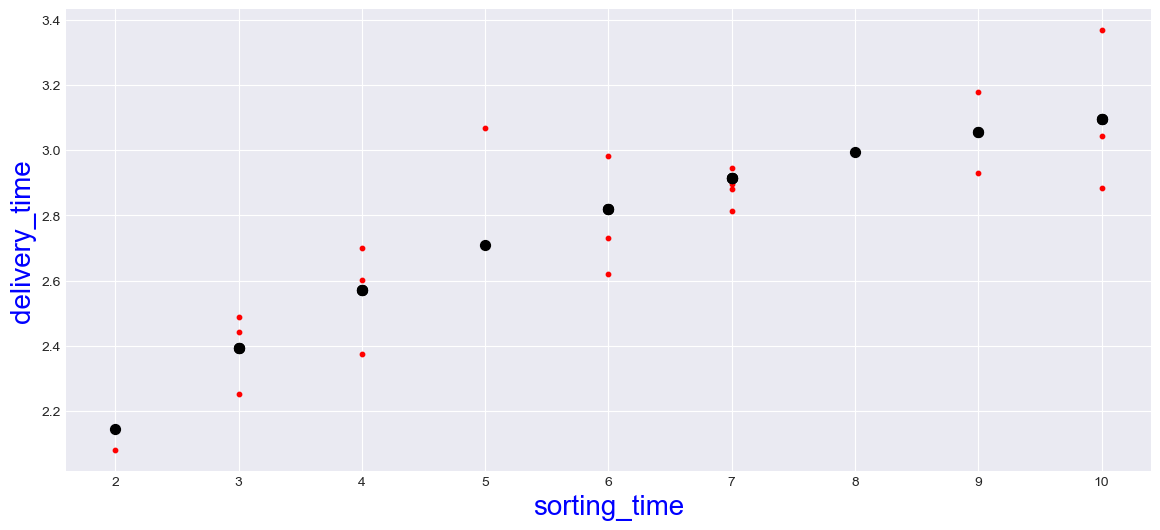

In [25]:
plt.figure(figsize=(14,6))
plt.style.use("seaborn-darkgrid")
plt.scatter(data["sorting_time"],np.log(data["delivery_time"]),s=10,color="red")
plt.scatter(data["sorting_time"],model3.fittedvalues,s=50,color="black")
plt.xlabel("sorting_time",size=20,color="blue")
plt.ylabel("delivery_time",size=20,color="blue")

# Question 2)
Build a prediction model for Salary_hike

In [26]:
#Read the data set
df=pd.read_csv("Salary_Data.csv")
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0



# EDA

In [27]:
df.shape

(30, 2)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [29]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [30]:
df.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [31]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [32]:
df.sample(3)

,YearsExperience,Salary
28,10.3,122391.0
4,2.2,39891.0
29,10.5,121872.0


In [33]:
df.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

# Data Visualiztion

Text(0, 0.5, 'Salary')

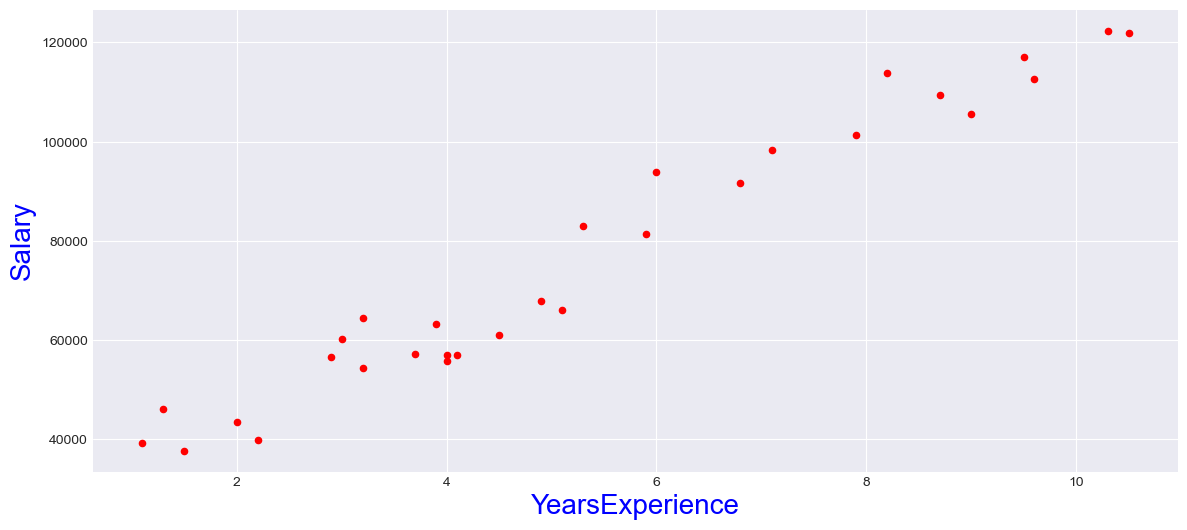

In [34]:
plt.figure(figsize=(14,6))
plt.style.use("seaborn-darkgrid")
plt.scatter(df["YearsExperience"],df["Salary"],s=20,color="red")
plt.xlabel("YearsExperience",size=20,color="blue")
plt.ylabel("Salary",size=20,color="blue")

In [43]:
import warnings
warnings.filterwarnings("ignore")

Text(0.5, 1.0, 'YearsExperience Q-Q plot')

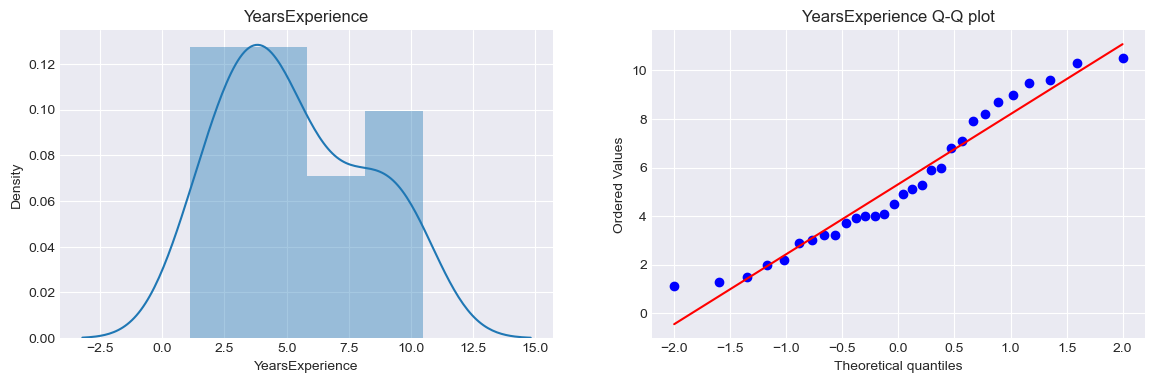

In [44]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(df['YearsExperience'])
plt.title('YearsExperience')

plt.subplot(122)
stats.probplot(df['YearsExperience'], dist = 'norm', plot=plt)
plt.title ('YearsExperience Q-Q plot')

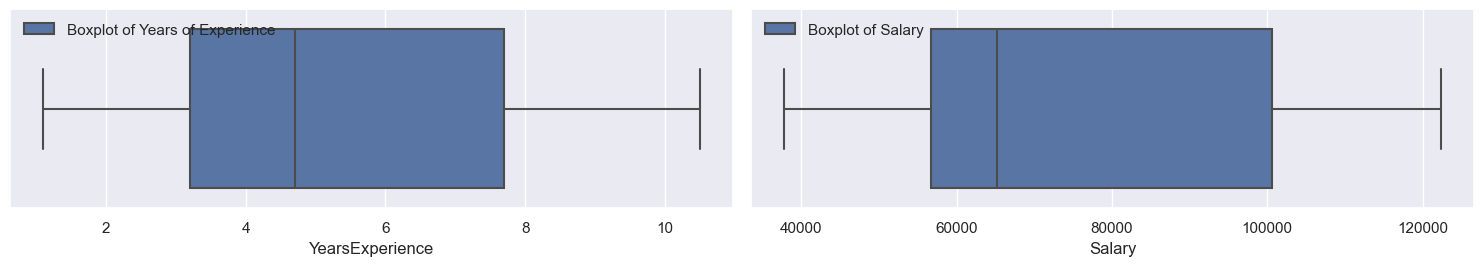

In [45]:
sns.set(rc={"figure.figsize": (15,5)})
#creating first plot
plt.subplot(2,2,1)
ax = sns.boxplot(x=df['YearsExperience'])
plt.legend(['Boxplot of Years of Experience'],loc='upper left',facecolor='WHITE',edgecolor='RED')

# Creating the second 
plt.subplot(2,2,2)
ax = sns.boxplot(x=df['Salary'])
plt.legend(["Boxplot of Salary"],loc='upper left',facecolor='PINK',edgecolor='RED')
plt.tight_layout() 
plt.show()

Text(0.5, 1.0, 'Salary Q-Q plot')

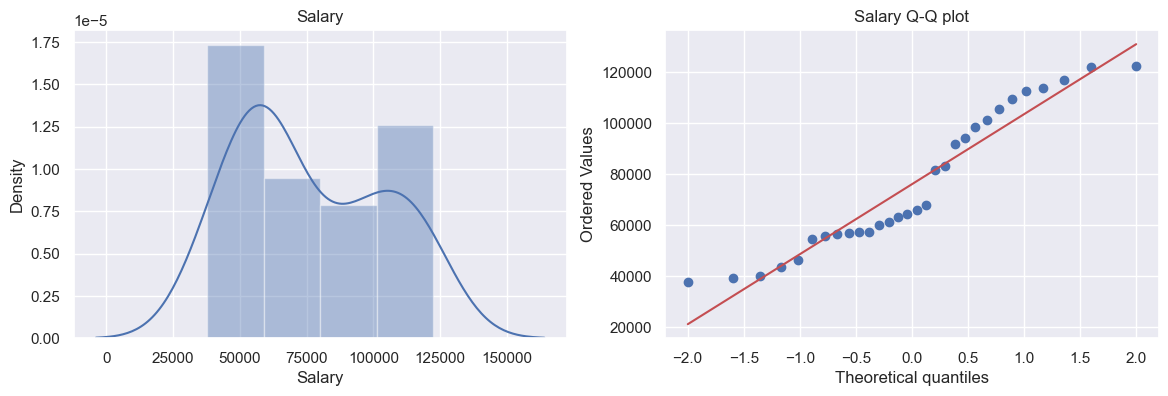

In [46]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(df['Salary'])
plt.title('Salary')

plt.subplot(122)
stats.probplot(df['Salary'], dist = 'norm', plot=plt)
plt.title ('Salary Q-Q plot')

In [ ]:
df.corr()
#It is a positive correlation plot.As experience increases salary also increases.

# Model

In [ ]:
model=LinearRegression()
model.fit(df[["YearsExperience"]],df["Salary"])

In [ ]:
yhat=model.predict(df[["YearsExperience"]])

In [ ]:
plt.figure(figsize=(14,6))
plt.style.use("seaborn-darkgrid")
plt.scatter(df["YearsExperience"],df["Salary"],s=20,color="red")
plt.plot(df["YearsExperience"],yhat,color="black")            
plt.xlabel("YearsExperience",size=20,color="blue")
plt.ylabel("Salary",size=20,color="blue")

In [ ]:
model.intercept_
# C value is 25792.200

In [ ]:
model.coef_
# m value is 9449.96

# Another Model

In [ ]:
import statsmodels.formula.api as smf

In [ ]:
#Simple linear Regression Model
model1=smf.ols("Salary~YearsExperience",data=df).fit()
model1.summary()

In [ ]:
#Logarithmic Transformation
model2=smf.ols("Salary~np.log(YearsExperience)",data=df).fit()
model2.summary()

In [ ]:
#Exponential Transformation
model3=smf.ols("np.log(Salary)~YearsExperience",data=df).fit()
model3.summary()

In [48]:
#Square root tarnsformation
model4=smf.ols("Salary~np.sqrt(YearsExperience)",data=df).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     377.8
Date:                Thu, 23 Mar 2023   Prob (F-statistic):           8.57e-18
Time:                        13:30:39   Log-Likelihood:                -308.52
No. Observations:                  30   AIC:                             621.0
Df Residuals:                      28   BIC:                             623.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                -1.606e+04   4921.599     -3.262      0.003   -2.61e+04   -5974.331
np.sqrt(YearsExperience)   4.15e+04   2135.122     19.437      0.000    3.71e+04    4.59e+04
==============================================================================
Omnibus:                        0.588   Durbin-Watson:                   1.031
Prob(Omnibus):                  0.745   Jarque-Bera (JB):                0.638
Skew:                           0.011   Prob(JB):                        0.727
Kurtosis:                       2.286   Cond. No.                         9.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
#Cube root tarnsformation
model5=smf.ols("Salary~np.cbrt(YearsExperience)",data=df).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     287.7
Date:                Thu, 23 Mar 2023   Prob (F-statistic):           2.91e-16
Time:                        13:35:19   Log-Likelihood:                -312.29
No. Observations:                  30   AIC:                             628.6
Df Residuals:                      28   BIC:                             631.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                -5.705e+04   7989.534     -7.141      0.000   -7.34e+04   -4.07e+04
np.cbrt(YearsExperience)  7.896e+04   4655.395     16.962      0.000    6.94e+04    8.85e+04
==============================================================================
Omnibus:                        0.462   Durbin-Watson:                   0.811
Prob(Omnibus):                  0.794   Jarque-Bera (JB):                0.575
Skew:                           0.047   Prob(JB):                        0.750
Kurtosis:                       2.328   Cond. No.                         12.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

ValueError: x and y must be the same size

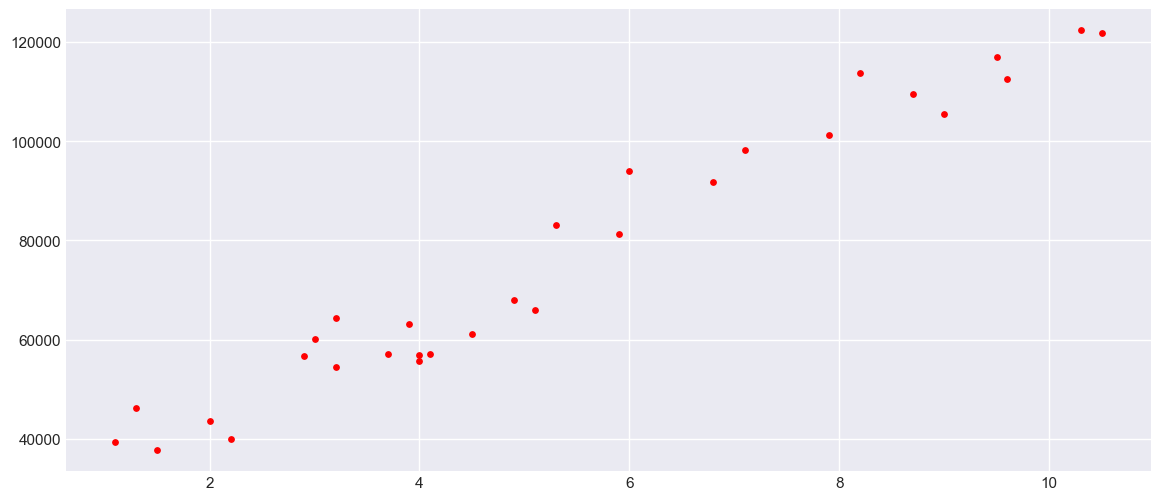

In [58]:
plt.figure(figsize=(14,6))
plt.style.use("seaborn-darkgrid")
plt.scatter(df["YearsExperience"],df["Salary"],s=15,color="red")
plt.scatter(df["YearsExperience"],model1.fittedvalues,color="black")            
plt.xlabel("YearsExperience",size=20,color="blue")
plt.ylabel("Salary",size=20,color="blue")

# Conclusion:-
    Among all the models simple linear regression model is the best model 
    with 95.7% accuracy.By this we can predict the salary hike.